## *The first 13 Cells are for clear understanding of BERT Architecture, if you want to skip it then take a long jump to cell 14*

In [7]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize a sample sentence
sentence = [
    "BERT is a transformer model developed by Google. It has revolutionized NLP by introducing bidirectional context and allowing pre-training on vast datasets.",
]
tokens = tokenizer.tokenize(sentence[0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)
print(len(token_ids))

Tokens: ['bert', 'is', 'a', 'transform', '##er', 'model', 'developed', 'by', 'google', '.', 'it', 'has', 'revolution', '##ized', 'nl', '##p', 'by', 'introducing', 'bid', '##ire', '##ction', '##al', 'context', 'and', 'allowing', 'pre', '-', 'training', 'on', 'vast', 'data', '##set', '##s', '.']
Token IDs: [14324, 2003, 1037, 10938, 2121, 2944, 2764, 2011, 8224, 1012, 2009, 2038, 4329, 3550, 17953, 2361, 2011, 10449, 7226, 7442, 7542, 2389, 6123, 1998, 4352, 3653, 1011, 2731, 2006, 6565, 2951, 13462, 2015, 1012]
34


### Tokenizer INFO

In [4]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [3]:
len(tokenizer.vocab), type(tokenizer.vocab)

(30522, collections.OrderedDict)

In [ ]:
for token, index in tokenizer.vocab.items():
    print(f"Index {index}: '{token}'")

#### Token Embeddings

In [6]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize("I am pradyumna prahas")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)  

[1045, 2572, 10975, 18632, 2819, 2532, 10975, 23278, 2015]


In [7]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

#### Segment Embeddings

In [8]:
import torch

segment_a = torch.zeros(len(token_ids))  
segment_b = torch.ones(len(token_ids))    

print("Segment A:", segment_a)
print("Segment B:", segment_b)

Segment A: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
Segment B: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])


#### Positional Embeddings

In [9]:

max_position_embeddings = 512
positional_embeddings = torch.arange(max_position_embeddings).unsqueeze(0)

print("Positional Embeddings Shape:", positional_embeddings.shape)  
positional_embeddings

Positional Embeddings Shape: torch.Size([1, 512])


tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

### Transformer layer

In [10]:
from transformers import BertModel
import torch

# Initialize the BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Prepare input tensors
inputs = tokenizer("Hello, BERT! How are you?", return_tensors='pt')
outputs = model(**inputs)

# Output from the last layer
last_hidden_states = outputs.last_hidden_state
print("Last Hidden States Shape:", last_hidden_states.shape)  

Last Hidden States Shape: torch.Size([1, 10, 768])


In [11]:
import torch.nn as nn

# Example feed-forward layer (as used in BERT)
class FeedForwardNetwork(nn.Module):
    def __init__(self, hidden_size, intermediate_size):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(hidden_size, intermediate_size)
        self.fc2 = nn.Linear(intermediate_size, hidden_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.activation(self.fc1(x)))

# Initialize the feed-forward network
ffn = FeedForwardNetwork(hidden_size=768, intermediate_size=3072)
sample_input = torch.rand(2, 10, 768)  # Batch size of 2, sequence length of 10
output = ffn(sample_input)

print("Feed Forward Output Shape:", output.shape)  # (2, 10, 768)


Feed Forward Output Shape: torch.Size([2, 10, 768])


In [12]:
class TransformerLayer(nn.Module):
    def __init__(self, hidden_size, intermediate_size):
        super(TransformerLayer, self).__init__()
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=12)
        self.ffn = FeedForwardNetwork(hidden_size, intermediate_size)
        self.norm1 = nn.LayerNorm(hidden_size)
        self.norm2 = nn.LayerNorm(hidden_size)

    def forward(self, x):
        
        attn_output, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_output)  # Residual connection + normalization

        # Feed-forward network with residual connection
        ffn_output = self.ffn(x)
        return self.norm2(x + ffn_output)  # Residual connection + normalization

# Initialize the transformer layer
transformer_layer = TransformerLayer(hidden_size=768, intermediate_size=3072)
sample_transformer_input = torch.rand(2, 10, 768)  # Batch size of 2, sequence length of 10
transformer_output = transformer_layer(sample_transformer_input)

print("Transformer Layer Output Shape:", transformer_output.shape)  # (2, 10, 768)


Transformer Layer Output Shape: torch.Size([2, 10, 768])


### OUTPUT LAYER

In [13]:
from transformers import BertForSequenceClassification

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Forward pass for a sample input
outputs = model(**inputs)
logits = outputs.logits
print("Logits Shape:", logits.shape)  # (batch_size, num_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Logits Shape: torch.Size([1, 2])


1. USING THE PRE_TRAINED CLASSIFICATION MODEL

### BERT FINETUNING

In [4]:
import numpy as np,pandas as pd

In [2]:
import requests
import json
import torch
import os
from tqdm import tqdm

In [3]:
import os

directory_path = './BERT-SQuAD'  

if not os.path.exists(directory_path):
    os.mkdir(directory_path)

print(f"Directory '{directory_path}' created.")

Directory './BERT-SQuAD' created.


In [3]:
!pip install transformers

# Squad Dataset Download

In [6]:
!wget -nc https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
!wget -nc https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json

--2024-11-20 10:31:34--  https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42123633 (40M) [application/json]
Saving to: 'train-v2.0.json'

train-v2.0.json     100%[===================>]  40.17M  --.-KB/s    in 0.1s    

2024-11-20 10:31:35 (313 MB/s) - 'train-v2.0.json' saved [42123633/42123633]

--2024-11-20 10:31:36--  https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4370528 (4.2M) [application/json]
Saving to: 'dev-v2.0.json'

dev-v2.0.json       1

In [7]:
# Load the training dataset and take a look at it
with open('train-v2.0.json', 'rb') as f:
  squad = json.load(f)

In [8]:
squad['data'][0].keys()

dict_keys(['title', 'paragraphs'])

In [9]:
from pprint import pprint

In [10]:
pprint(squad['data'][1]["title"])

'Frédéric_Chopin'


In [22]:
len(squad["data"])

442

In [8]:
gr = -1
for idx, group in enumerate(squad['data']):
  print(group['title'])
  if group['title'] == 'Greece':
    gr = idx
    print(gr)
    break

Beyoncé
Frédéric_Chopin
Sino-Tibetan_relations_during_the_Ming_dynasty
IPod
The_Legend_of_Zelda:_Twilight_Princess
Spectre_(2015_film)
2008_Sichuan_earthquake
New_York_City
To_Kill_a_Mockingbird
Solar_energy
Kanye_West
Buddhism
American_Idol
Dog
2008_Summer_Olympics_torch_relay
Genome
Comprehensive_school
Republic_of_the_Congo
Prime_minister
Institute_of_technology
Wayback_Machine
Dutch_Republic
Symbiosis
Canadian_Armed_Forces
Cardinal_(Catholicism)
Iranian_languages
Lighting
Separation_of_powers_under_the_United_States_Constitution
Architecture
Human_Development_Index
Southern_Europe
BBC_Television
Arnold_Schwarzenegger
Plymouth
Heresy
Warsaw_Pact
Materialism
Christian
Sony_Music_Entertainment
Oklahoma_City
Hunter-gatherer
United_Nations_Population_Fund
Russian_Soviet_Federative_Socialist_Republic
Alexander_Graham_Bell
Pub
Internet_service_provider
Comics
Saint_Helena
Aspirated_consonant
Hydrogen
Space_Race
Web_browser
BeiDou_Navigation_Satellite_System
Canon_law
Communications_in_Som

In [11]:
def read_data(path):  
  with open(path, 'rb') as f:
    squad = json.load(f)

  contexts = []
  questions = []
  answers = []

  for group in squad['data']:
    for passage in group['paragraphs']:
      context = passage['context']
      for qa in passage['qas']:
        question = qa['question']
        for answer in qa['answers']:
          contexts.append(context)
          questions.append(question)
          answers.append(answer)

  return contexts, questions, answers

In [12]:
train_contexts, train_questions, train_answers = read_data('train-v2.0.json')
valid_contexts, valid_questions, valid_answers = read_data('dev-v2.0.json')

In [13]:
# print a random question and answer
print(f'There are {len(train_questions)} questions')
print(train_questions[-10000])
print(train_answers[-10000])

There are 86821 questions
What is a modern common occurence with antibiotics?
{'text': 'resistance of bacteria', 'answer_start': 17}


In [15]:
def add_end_idx(answers, contexts):
  for answer, context in zip(answers, contexts):
    gold_text = answer['text']
    start_idx = answer['answer_start']
    end_idx = start_idx + len(gold_text)

    if context[start_idx:end_idx] == gold_text:
      answer['answer_end'] = end_idx
    elif context[start_idx-1:end_idx-1] == gold_text:
      answer['answer_start'] = start_idx - 1
      answer['answer_end'] = end_idx - 1     
    elif context[start_idx-2:end_idx-2] == gold_text:
      answer['answer_start'] = start_idx - 2
      answer['answer_end'] = end_idx - 2     

add_end_idx(train_answers, train_contexts)
add_end_idx(valid_answers, valid_contexts)

In [16]:
# You can see that now we get the answer_end also
print(train_questions[-10000])
print(train_answers[-10000])

What is a modern common occurence with antibiotics?
{'text': 'resistance of bacteria', 'answer_start': 17, 'answer_end': 39}


In [17]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
valid_encodings = tokenizer(valid_contexts, valid_questions, truncation=True, padding=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [18]:
train_encodings.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [19]:
no_of_encodings = len(train_encodings['input_ids'])
print(f'We have {no_of_encodings} context-question pairs')

We have 86821 context-question pairs


In [20]:
train_encodings['input_ids'][0]

[101,
 20773,
 21025,
 19358,
 22815,
 1011,
 5708,
 1006,
 1013,
 12170,
 23432,
 29715,
 3501,
 29678,
 12325,
 29685,
 1013,
 10506,
 1011,
 10930,
 2078,
 1011,
 2360,
 1007,
 1006,
 2141,
 2244,
 1018,
 1010,
 3261,
 1007,
 2003,
 2019,
 2137,
 3220,
 1010,
 6009,
 1010,
 2501,
 3135,
 1998,
 3883,
 1012,
 2141,
 1998,
 2992,
 1999,
 5395,
 1010,
 3146,
 1010,
 2016,
 2864,
 1999,
 2536,
 4823,
 1998,
 5613,
 6479,
 2004,
 1037,
 2775,
 1010,
 1998,
 3123,
 2000,
 4476,
 1999,
 1996,
 2397,
 4134,
 2004,
 2599,
 3220,
 1997,
 1054,
 1004,
 1038,
 2611,
 1011,
 2177,
 10461,
 1005,
 1055,
 2775,
 1012,
 3266,
 2011,
 2014,
 2269,
 1010,
 25436,
 22815,
 1010,
 1996,
 2177,
 2150,
 2028,
 1997,
 1996,
 2088,
 1005,
 1055,
 2190,
 1011,
 4855,
 2611,
 2967,
 1997,
 2035,
 2051,
 1012,
 2037,
 14221,
 2387,
 1996,
 2713,
 1997,
 20773,
 1005,
 1055,
 2834,
 2201,
 1010,
 20754,
 1999,
 2293,
 1006,
 2494,
 1007,
 1010,
 2029,
 2511,
 2014,
 2004,
 1037,
 3948,
 3063,
 4969,
 1010,
 36

In [21]:
tokenizer.decode(train_encodings['input_ids'][0])

'[CLS] beyonce giselle knowles - carter ( / biːˈjɒnseɪ / bee - yon - say ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r & b girl - group destiny \' s child. managed by her father, mathew knowles, the group became one of the world \' s best - selling girl groups of all time. their hiatus saw the release of beyonce \' s debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number - one singles " crazy in love " and " baby boy ". [SEP] when did beyonce start becoming popular? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [22]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []
  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end'] - 1))

    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length
    if end_positions[-1] is None:
      end_positions[-1] = tokenizer.model_max_length

  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(valid_encodings, valid_answers)

In [23]:
train_encodings['start_positions'][:10]

[67, 55, 128, 47, 69, 81, 124, 91, 69, 72]

In [27]:
class SQuAD_Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings):
    self.encodings = encodings
  def __getitem__(self, idx):
    return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
  def __len__(self):
    return len(self.encodings.input_ids)

In [28]:
train_dataset = SQuAD_Dataset(train_encodings)
valid_dataset = SQuAD_Dataset(valid_encodings)

In [29]:
from torch.utils.data import DataLoader

# Define the dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16)

In [30]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Working on {device}')

Working on cuda


In [32]:
from transformers import AdamW

N_EPOCHS = 5
optim = AdamW(model.parameters(), lr=5e-5)

model.to(device)
model.train()

for epoch in range(N_EPOCHS):
  loop = tqdm(train_loader, leave=True)
  for batch in loop:
    optim.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    loss.backward()
    optim.step()

    loop.set_description(f'Epoch {epoch+1}')
    loop.set_postfix(loss=loss.item())
model.save_pretrained(f"/epoch{epoch}")

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 5: 100%|██████████| 5427/5427 [1:19:33<00:00,  1.14it/s, loss=0.376] 


In [33]:
print("Done and it took 9 hours")

Done and it took 9 hours


In [36]:
model_path = '/kaggle/working/BERT-SQuAD'
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/kaggle/working/BERT-SQuAD/tokenizer_config.json',
 '/kaggle/working/BERT-SQuAD/special_tokens_map.json',
 '/kaggle/working/BERT-SQuAD/vocab.txt',
 '/kaggle/working/BERT-SQuAD/added_tokens.json',
 '/kaggle/working/BERT-SQuAD/tokenizer.json')

In [3]:
from transformers import BertForQuestionAnswering, BertTokenizerFast

model_path = '/kaggle/input/finetuned-llm-bert'#loading the saved BERT Model
model = BertForQuestionAnswering.from_pretrained(model_path)
tokenizer = BertTokenizerFast.from_pretrained(model_path)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Working on {device}')
model = model.to(device)

Working on cuda


In [4]:
model

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, 

In [5]:
def get_prediction(context, question):
  inputs = tokenizer.encode_plus(question, context, return_tensors='pt').to(device)
  outputs = model(**inputs)
  
  answer_start = torch.argmax(outputs[0])  
  answer_end = torch.argmax(outputs[1]) + 1 
  
  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
  
  return answer

def normalize_text(s):
  """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
  import string, re
  def remove_articles(text):
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    return re.sub(regex, " ", text)
  def white_space_fix(text):
    return " ".join(text.split())
  def remove_punc(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)
  def lower(text):
    return text.lower()

  return white_space_fix(remove_articles(remove_punc(lower(s))))

def exact_match(prediction, truth):
    return bool(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
  pred_tokens = normalize_text(prediction).split()
  truth_tokens = normalize_text(truth).split()
  
  # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
  if len(pred_tokens) == 0 or len(truth_tokens) == 0:
    return int(pred_tokens == truth_tokens)
  
  common_tokens = set(pred_tokens) & set(truth_tokens)
  
  # if there are no common tokens then f1 = 0
  if len(common_tokens) == 0:
    return 0
  
  prec = len(common_tokens) / len(pred_tokens)
  rec = len(common_tokens) / len(truth_tokens)
  
  return round(2 * (prec * rec) / (prec + rec), 2)
  
def question_answer(context, question,answer):
  prediction = get_prediction(context,question)
#   em_score = exact_match(prediction, answer)
#   f1_score = compute_f1(prediction, answer)
#   return  prediction
  print(f'Question: {question}')
  print(f'Prediction: {prediction}')
  print(f'True Answer: {answer}')
#   print(f'Exact match: {em_score}')
#   print(f'F1 score: {f1_score}\n')

In [11]:
## ON OUR DATASET 
contexts = ["The Earth orbits the Sun once every 365.25 days, which constitutes a year."]

questions = ['How long does it take for the Earth to orbit the Sun?']

answers = ["365.35 days"]

for question, answer in zip(questions, answers):
  question_answer(contexts[0], question, answer)

Question: How long does it take for the Earth to orbit the Sun?
Prediction: a year
True Answer: significant risks


In [7]:
context = """Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, 
          songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing 
          and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. 
          Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. 
          Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, 
          earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy"."""


questions = ["For whom the passage is talking about?",
             "When did Beyonce born?",
             "Where did Beyonce born?",
             "What is Beyonce's nationality?",
             "Who was the Destiny's group manager?",
             "What name has the Beyoncé's debut album?",
             "How many Grammy Awards did Beyonce earn?",
             "When did the Beyoncé's debut album release?",
             "Who was the lead singer of R&B girl-group Destiny's Child?"]

answers = ["Beyonce Giselle Knowles - Carter", "September 4, 1981", "Houston, Texas", 
           "American", "Mathew Knowles", "Dangerously in Love", "five", "2003", 
           "Beyonce Giselle Knowles - Carter"]

for question, answer in zip(questions, answers):
  question_answer(context, question, answer)

Question: For whom the passage is talking about?
Prediction: hiatus
True Answer: Beyonce Giselle Knowles - Carter
Question: When did Beyonce born?
Prediction: september 4, 1981
True Answer: September 4, 1981
Question: Where did Beyonce born?
Prediction: houston, texas
True Answer: Houston, Texas
Question: What is Beyonce's nationality?
Prediction: american
True Answer: American
Question: Who was the Destiny's group manager?
Prediction: mathew knowles
True Answer: Mathew Knowles
Question: What name has the Beyoncé's debut album?
Prediction: 
True Answer: Dangerously in Love
Question: How many Grammy Awards did Beyonce earn?
Prediction: 2003
True Answer: five
Question: When did the Beyoncé's debut album release?
Prediction: 2003
True Answer: 2003
Question: Who was the lead singer of R&B girl-group Destiny's Child?
Prediction: hiatus
True Answer: Beyonce Giselle Knowles - Carter


In [35]:
context = """Athens is the capital and largest city of Greece. Athens dominates the Attica region and is one of the world's oldest cities, 
             with its recorded history spanning over 3,400 years and its earliest human presence starting somewhere between the 11th and 7th millennium BC.
             Classical Athens was a powerful city-state. It was a center for the arts, learning and philosophy, and the home of Plato's Academy and Aristotle's Lyceum.
             It is widely referred to as the cradle of Western civilization and the birthplace of democracy, largely because of its cultural and political impact on the European continent—particularly Ancient Rome.
             In modern times, Athens is a large cosmopolitan metropolis and central to economic, financial, industrial, maritime, political and cultural life in Greece. 
             In 2021, Athens' urban area hosted more than three and a half million people, which is around 35% of the entire population of Greece.
             Athens is a Beta global city according to the Globalization and World Cities Research Network, and is one of the biggest economic centers in Southeastern Europe. 
             It also has a large financial sector, and its port Piraeus is both the largest passenger port in Europe, and the second largest in the world."""

questions = ["Which is the largest city in Greece?",
             "For what was the Athens center?",
             "Which city was the home of Plato's Academy?"]

answers = ["Athens", "center for the arts, learning and philosophy", "Athens"]

for question, answer in zip(questions, answers):
  question_answer(context, question, answer)

Question: Which is the largest city in Greece?
Prediction: athens
True Answer: Athens
Question: For what was the Athens center?
Prediction: 
True Answer: center for the arts, learning and philosophy
Question: Which city was the home of Plato's Academy?
Prediction: athens
True Answer: Athens


In [36]:
context = """Angelos Poulis was born on 8 April 2001 in Nicosia, Cyprus. He is half Cypriot and half Greek. 
            He is currently studying at the Department of Informatics and Telecommunications of the University of Athens in Greece. 
            His scientific interests are in the broad field of Artificial Intelligence and he loves to train neural networks! 
            Okay, I'm Angelos and I'll stop talking about me right now."""

questions = ["When did Angelos born?",
             "In what university is Angelos studying now?",
             "What is Angelos' nationality?",
             "What are his scientific interests?",
             "What I will do right now?"]

answers = ["8 April 2001", "University of Athens", 
           "half Cypriot and half Greek", "Artificial Intelligence", 
           "stop talking about me"]

for question, answer in zip(questions, answers):
  question_answer(context, question, answer)

Question: When did Angelos born?
Prediction: 8 april 2001
True Answer: 8 April 2001
Question: In what university is Angelos studying now?
Prediction: university of athens
True Answer: University of Athens
Question: What is Angelos' nationality?
Prediction: half cypriot
True Answer: half Cypriot and half Greek
Question: What are his scientific interests?
Prediction: artificial intelligence
True Answer: Artificial Intelligence
Question: What I will do right now?
Prediction: 
True Answer: stop talking about me


## INTRODUCTION TO RAG

In [10]:
!pip install faiss-cpu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 63.3 MB/s eta 0:00:00:00:0100:01


In [4]:
import faiss
import pickle
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'faiss'

In [13]:
class RagModel:
    def __init__(self,model):
        self.sentencetransformer=model
        self.sentences=[]
        self.dimension=384
        self.vectordb=faiss.IndexFlatL2(self.dimension)
        self.display_image("/kaggle/input/rag-datasets/RAG_Datasets/Modelphoto.png")
    def display_image(self, image_path):
        """Load and display an image."""
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.figure(figsize=(3,2))
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.show()
        else:
            print(f"Image not found: {image_path}")
    def train(self,X_train,Y_train):
        try:
            if(len(X_train)!=len(Y_train)):
                raise ValueError("Index Error")
            for i in range(len(X_train)):
                s=""
                if(X_train[i]!=None):
                    s+=Y_train[i]
                else:
                    s+=X_train[i]+' the answer is '+Y_train[i]
                vector=self.sentencetransformer.encode([s])[0]
                self.sentences.append(s)
                vector=np.array([vector],dtype='float32')
                self.vectordb.add(vector)
        except Exception as e:
            raise RuntimeError(f"Error occured while training is {e}")
    def predict(self,question,neighbours):
        converted_vector=self.sentencetransformer.encode([question])[0]
        converted_vector=np.array([converted_vector],dtype='float32')
        distance,indices=self.vectordb.search(converted_vector,neighbours)
        results=[]
        for i in indices[0]:
            sen=self.sentences[i]
            if(sen not in results):
                results.append(sen)
#         results=[self.sentences[i] for i in indices[0]]
        return results
    def save(self, model_path):
        if not os.path.exists(model_path):
            os.makedirs(model_path)
        faiss_index_path = os.path.join(model_path, "faiss_index.bin")
        faiss.write_index(self.vectordb, faiss_index_path)

        sentences_path = os.path.join(model_path, "sentences.pkl")
        with open(sentences_path, "wb") as f:
            pickle.dump(self.sentences, f)

        print(f"Model saved to {model_path}")

    def load(self, model_path):
        faiss_index_path = os.path.join(model_path, "faiss_index.bin")
        self.vectordb = faiss.read_index(faiss_index_path)
        sentences_path = os.path.join(model_path, "sentences.pkl")
        with open(sentences_path, "rb") as f:
            self.sentences = pickle.load(f)
        print(f"Model loaded from {model_path}")

In [14]:
!pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 6.9 MB/s eta 0:00:00ta 0:00:01


In [15]:
import re,time
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
Vector_model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

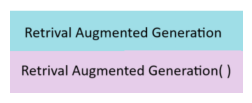

In [17]:
mymodel=RagModel(Vector_model)

In [19]:
mymodel.load("/kaggle/input/rag-datasets/RAG_Datasets")

Model loaded from /kaggle/input/rag-datasets/RAG_Datasets


In [50]:
question='What is threat?'

In [36]:
context_list=mymodel.predict(question,1)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
for neighbour in range(10,0,-1):
    try:
        context_list=mymodel.predict(question,neighbour)
        context=""
        for i in context_list:
            context+=i+" "
        extracted_answer=question_answer(context,question,"")
        break
    except:
        continue

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
print("RAG Output:- ",context)

RAG Output:-  In cybersecurity terms, a threat assessment refers to an evaluation of the risks and potential threats to an organization.   


In [ ]:
To use my BERT model which is Finetuned on SQUAD Dataset go to this link
-> https://huggingface.co/Pradyumna22/Finetuned-BERT-SQUAD?library=transformers

In [ ]:
To use my RAG Model for Cybersecurity Related Queries go to this link
-> Use the RAG Code and download the faiss index from here => https://huggingface.co/Pradyumna22/RAG-model-for-Cyber-security/tree/main